In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import isnan

In [2]:
haptophytes = ['Diatoms',
               'Coccolithophores (Haptophytes)',
               'Dinoflagellates',
               'Prochlorococcus',
               'Synechococcus',
               'chlorophytes',
               'other_Haptophytes']

pigments = ['Chlorophyll a, total',
            'Divinyl chlorophyll a',
            'Chlorophyll b',
            'Divinyl chlorophyll b',
            '19-Hexanoyloxyfucoxanthin',
            '19-Butanoyloxyfucoxanthin',
            'Fucoxanthin',
            'Peridinin',
            'Alloxanthin',
            'Zeaxanthin']

position = ['Latitude', 
            'Longitude']

## Data preprocessing

In [3]:
global_hplc_data = pd.read_csv('global_hplc_data.csv')
#creating a datetime column
global_hplc_data['Date'] = pd.to_datetime(global_hplc_data[['Year', 'Month', 'Day']])
global_hplc_data.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)
cols = ['Date'] + global_hplc_data.columns.tolist()[:-1]
global_hplc_data = global_hplc_data[cols]
#renaming position columns
global_hplc_data.rename(columns={'Lat': 'Latitude', 'Long': 'Longitude'}, inplace=True)
#remove incoherent values
global_hplc_data.replace('A', np.NaN, inplace=True)

tara_data_phyto_hplc = pd.read_csv('tara_data_phyto_hplc.csv')
#setting station as index
tara_data_phyto_hplc.rename(columns={tara_data_phyto_hplc.columns[0]: "Station"}, inplace = True)
tara_data_phyto_hplc = tara_data_phyto_hplc.set_index(tara_data_phyto_hplc.iloc[:,0]).drop('Station', axis=1)
#creating a datetime column
tara_data_phyto_hplc['Date'] = pd.to_datetime(tara_data_phyto_hplc[['Year', 'Month', 'Day']])
tara_data_phyto_hplc.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)
cols = ['Date'] + tara_data_phyto_hplc.columns.tolist()[:-1]
tara_data_phyto_hplc = tara_data_phyto_hplc[cols]

#creating aliases
glob_df = global_hplc_data
tara_df = tara_data_phyto_hplc

#replacing non numerical values with NaN, and negative values with zeros
glob_df = glob_df.apply(lambda x: max(0,x) if type(x) == float else x)
tara_df = tara_df.apply(lambda x: max(0,x) if type(x) == float else x)

for feature in pigments+position:
    glob_df[feature] = glob_df[feature].astype(float)
    tara_df[feature] = tara_df[feature].astype(float)
for feature in haptophytes:
    tara_df[feature] = tara_df[feature].astype(float)

In [4]:
print(f'global data shape: {global_hplc_data.shape}')
display(global_hplc_data.head())

global data shape: (9484, 13)


,Date,Latitude,Longitude,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,1992-06-02,18.300,-21.056,0.482,0.055,0.059,NaN,0.085,0.016,0.029,0.017,0.007,0.188
1,1992-06-05,20.325,-18.366,1.248,0.000,0.277,NaN,0.248,0.061,0.332,0.064,0.106,0.039
2,1992-06-06,20.361,-18.341,1.517,0.000,0.206,NaN,0.234,0.065,0.636,0.056,0.207,0.030
3,1997-06-13,20.322,-18.344,3.363,0.000,0.000,NaN,0.137,0.035,2.057,0.085,0.000,0.048
4,1992-06-16,18.302,-21.071,1.325,0.000,0.192,NaN,0.288,0.053,0.336,0.152,0.032,0.174


In [5]:
global_hplc_data.describe().drop('count').applymap(lambda x : np.round(x, 5))

,Latitude,Longitude,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
mean,-14.15257,-34.91145,1.54416,0.03178,0.05721,0.00295,0.04242,0.85459,0.07378,0.06015,0.05247
std,47.24119,71.52857,3.68796,0.08862,0.20121,0.01748,0.11607,2.98596,0.58111,0.20495,0.14162
min,-79.36667,-179.99823,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00310,0.00000,-0.00290,0.00000
25%,-64.81511,-69.61952,0.15300,0.00000,0.00400,0.00000,0.00600,0.01500,0.00000,0.00000,0.00035
50%,-5.18900,-64.05100,0.39188,0.01242,0.01741,0.00000,0.01839,0.07946,0.00423,0.00441,0.01853
75%,34.00700,-9.21054,1.17046,0.04160,0.05470,0.00010,0.04500,0.37200,0.02000,0.03590,0.05900
max,65.25850,179.99288,92.41320,3.05633,9.12550,0.34100,4.61160,100.77410,25.64400,5.45264,2.39130


In [6]:
print(f'tara data shape: {tara_data_phyto_hplc.shape}')
display(tara_data_phyto_hplc.head())

tara data shape: (211, 20)


,Date,Latitude,Longitude,Diatoms,Coccolithophores (Haptophytes),Dinoflagellates,Prochlorococcus,Synechococcus,chlorophytes,other_Haptophytes,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
Station,,,,,,,,,,,,,,,,,,,,
TARA_001,2009-09-07,44.415,-9.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_002,2009-09-09,39.038,-10.790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_003,2009-09-13,36.672,-10.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_004,2009-09-15,36.563,-6.553,0.003778,0.014101,0.023318,0.680801,0.157221,0.033847,0.035769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_005,2009-09-20,36.030,-4.405,0.013932,0.016778,0.031345,0.193025,0.438118,0.047041,0.127706,0.420166,0.001259,0.033233,0.0,0.025321,0.003881,0.121394,0.0,0.00154,0.00696


In [7]:
tara_data_phyto_hplc.describe().drop('count').applymap(lambda x : np.round(x, 5))

,Latitude,Longitude,Diatoms,Coccolithophores (Haptophytes),Dinoflagellates,Prochlorococcus,Synechococcus,chlorophytes,other_Haptophytes,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
mean,20.28453,-22.56241,0.06411,0.01099,0.03877,0.32250,0.20913,0.10801,0.12807,0.36480,0.02575,0.02861,0.00095,0.04362,0.01422,0.08484,0.01271,0.00688,0.03858
std,40.85732,76.39156,0.12733,0.01244,0.05796,0.29090,0.19124,0.12877,0.10910,0.56483,0.03319,0.02851,0.00340,0.06607,0.02077,0.22265,0.03433,0.01721,0.03639
min,-64.30900,-168.51800,0.00000,0.00000,0.00000,0.00000,0.00000,0.00144,0.00759,0.01150,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-16.97750,-84.58350,0.00529,0.00286,0.01266,0.04962,0.03241,0.02419,0.05791,0.09940,0.00000,0.00660,0.00000,0.00874,0.00278,0.00330,0.00086,0.00000,0.00737
50%,23.39100,-9.83300,0.01409,0.00754,0.02296,0.25669,0.15735,0.06468,0.10967,0.18032,0.00484,0.02037,0.00000,0.01763,0.00530,0.01145,0.00298,0.00060,0.02855
75%,63.13600,39.71550,0.04639,0.01477,0.04516,0.54463,0.35243,0.13215,0.15514,0.37374,0.04756,0.03952,0.00000,0.05433,0.01722,0.07493,0.00665,0.00429,0.05994
max,79.67500,174.90100,0.68563,0.07074,0.47891,0.95468,0.66675,0.71755,0.69430,4.55640,0.12995,0.13604,0.02529,0.41720,0.12040,1.78110,0.23380,0.10570,0.17934


## Visualizing NaN values

### NaN haptophyte values in global data

NaN pigments in global_hplc_data (9484 rows)


,NaN number,ratio
Pigment,,
"Chlorophyll a, total",0,0.000
Divinyl chlorophyll a,5539,0.584
Chlorophyll b,1242,0.131
Divinyl chlorophyll b,7172,0.756
19-Hexanoyloxyfucoxanthin,43,0.005
19-Butanoyloxyfucoxanthin,189,0.020
Fucoxanthin,215,0.023
Peridinin,984,0.104
Alloxanthin,1396,0.147


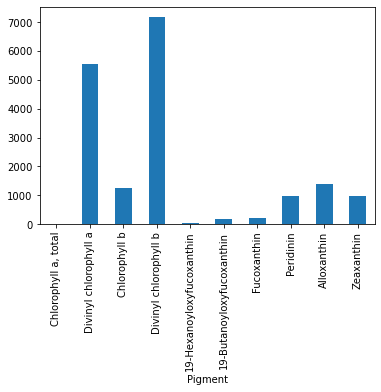

In [8]:
print(f'NaN pigments in global_hplc_data ({global_hplc_data.shape[0]} rows)')
dict_tmp = {}
for pigment in pigments:
    n_nan = global_hplc_data[pigment].isna().sum()
    dict_tmp[pigment] = n_nan
s_tmp = pd.Series(dict_tmp, name='NaN number')
s_tmp.index.name = 'Pigment'
df_temp = pd.DataFrame(s_tmp)
df_temp['ratio'] = df_temp['NaN number'].apply(lambda x : np.round(x/global_hplc_data.shape[0], 3))
display(df_temp)

%matplotlib inline
df_temp['NaN number'].plot(kind='bar');

### NaN haptophyte values in TARA data

NaN haptophytes in tara_data_phyto_hplc (211 rows)


,NaN number,ratio
Haptophyte,,
Diatoms,66,0.313
Coccolithophores (Haptophytes),66,0.313
Dinoflagellates,66,0.313
Prochlorococcus,66,0.313
Synechococcus,66,0.313
chlorophytes,66,0.313
other_Haptophytes,66,0.313


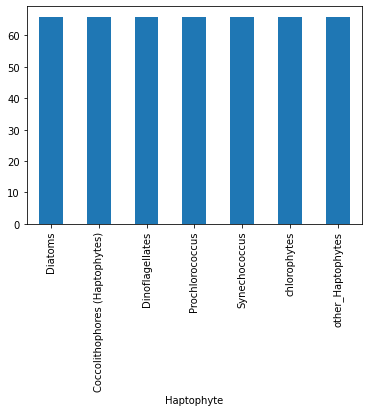

In [9]:
print(f'NaN haptophytes in tara_data_phyto_hplc ({tara_data_phyto_hplc.shape[0]} rows)')
dict_tmp = {}
for haptophyte in haptophytes:
    n_nan = tara_data_phyto_hplc[haptophyte].isna().sum()
    dict_tmp[haptophyte] = n_nan
s_tmp = pd.Series(dict_tmp, name='NaN number')
s_tmp.index.name = 'Haptophyte'
df_temp = pd.DataFrame(s_tmp)
df_temp['ratio'] = df_temp['NaN number'].apply(lambda x : np.round(x/tara_data_phyto_hplc.shape[0], 3))
display(df_temp)

%matplotlib inline
df_temp['NaN number'].plot(kind='bar');

### NaN pigment values in TARA data

NaN pigments in tara_data_phyto_hplc (211 rows)


,NaN number,ratio
Pigment,,
"Chlorophyll a, total",67,0.318
Divinyl chlorophyll a,67,0.318
Chlorophyll b,67,0.318
Divinyl chlorophyll b,67,0.318
19-Hexanoyloxyfucoxanthin,67,0.318
19-Butanoyloxyfucoxanthin,67,0.318
Fucoxanthin,67,0.318
Peridinin,67,0.318
Alloxanthin,67,0.318


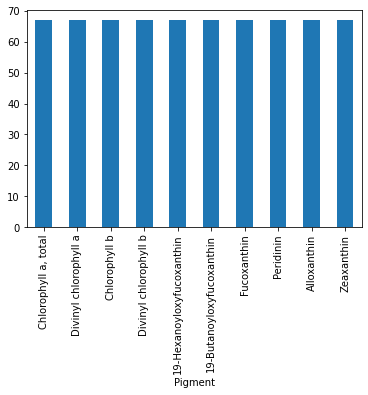

In [10]:
print(f'NaN pigments in tara_data_phyto_hplc ({tara_data_phyto_hplc.shape[0]} rows)')
dict_tmp = {}
for pigment in pigments:
    n_nan = tara_data_phyto_hplc[pigment].isna().sum()
    dict_tmp[pigment] = n_nan
s_tmp = pd.Series(dict_tmp, name='NaN number')
s_tmp.index.name = 'Pigment'
df_temp = pd.DataFrame(s_tmp)
df_temp['ratio'] = df_temp['NaN number'].apply(lambda x : np.round(x/tara_data_phyto_hplc.shape[0], 3))
display(df_temp)

%matplotlib inline
df_temp['NaN number'].plot(kind='bar');

## Boxplots

### Pigments concentration in global data

C:\Users\danie\AppData\Local\Temp/ipykernel_440/212110233.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


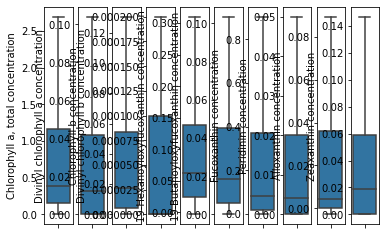

In [11]:
df = glob_df.copy()
selection = pigments

df = df.drop('Date', axis=1).astype(float)

fig, axes = plt.subplots(1, len(selection))

for i, col in enumerate(selection):
    ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], showfliers=False)
    #ax.set_ylim(df[col].min(), df[col].max())
    ax.set_ylabel(f'{col} concentration')
fig.tight_layout()
plt.rcParams['figure.figsize']=(15,6)

It appears that concentration in Divinyl chlorophyll b is particular, as we cannot see the median value. Let's check it by itself :

Divchlb value counts


0.0000    1392
0.0001     352
0.0040      41
0.0030      34
0.0020      29
Name: Divinyl chlorophyll b, dtype: int64

''

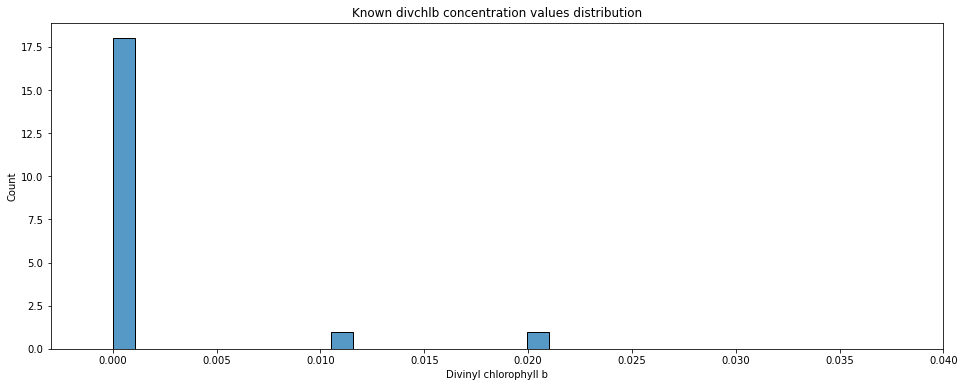

In [12]:
print('Divchlb value counts')
display(df['Divinyl chlorophyll b'].value_counts().head())

plt.figure(figsize=(16,6))
sns.histplot(df['Divinyl chlorophyll b'].dropna().iloc[:20], bins=20)
plt.title('Known divchlb concentration values distribution')
plt.xlim([-0.003, 0.04])
;

''

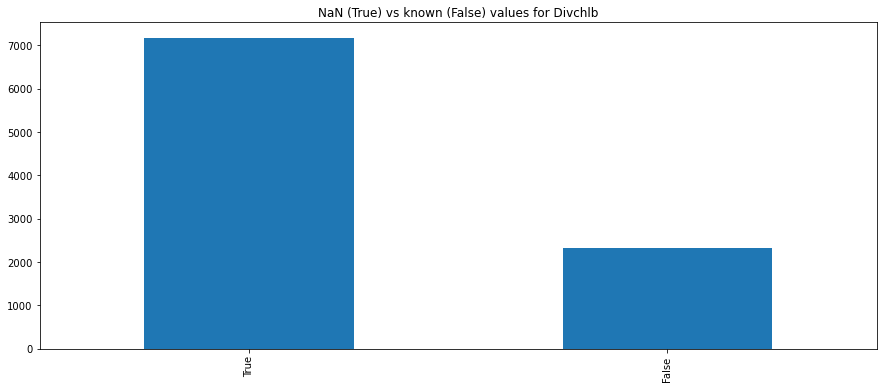

In [13]:
df['Divinyl chlorophyll b'].isnull().value_counts().plot(kind='bar')
plt.title('NaN (True) vs known (False) values for Divchlb')
;

After checking if this feature is important for the two other dataframes, we might get rid of it. Most of our data is unknown anyway.

### Pigments concentration in TARA data

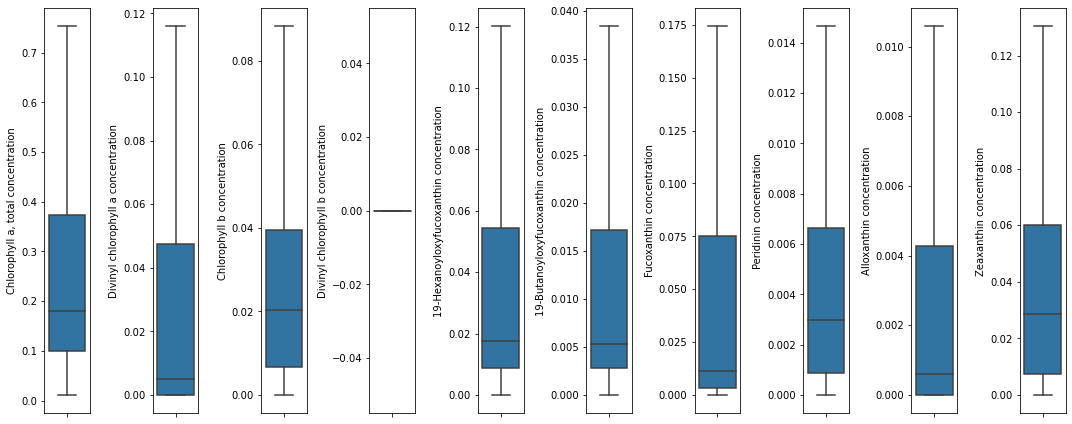

In [14]:
df = tara_df.copy()
selection = pigments

df = df.drop('Date', axis=1).astype(float)

fig, axes = plt.subplots(1, len(selection))

for i, col in enumerate(selection):
    ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], showfliers=False)
    #ax.set_ylim(df[col].min(), df[col].max())
    ax.set_ylabel(f'{col} concentration')
fig.tight_layout()
plt.rcParams['figure.figsize']=(15,6)

Same thing for Divchlb : let's check the distribution.

Divchlb value counts


0.000000    124
0.000372      1
0.012527      1
0.008500      1
0.001359      1
Name: Divinyl chlorophyll b, dtype: int64

''

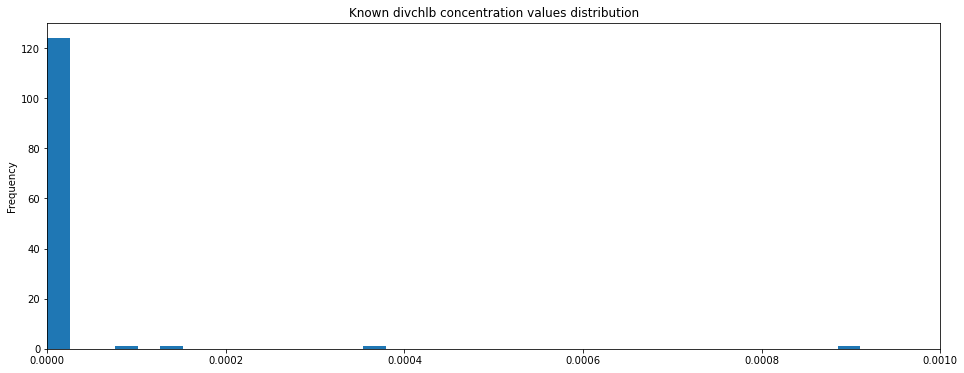

In [15]:
print('Divchlb value counts')
display(df['Divinyl chlorophyll b'].value_counts().head())

plt.figure(figsize=(16,6))
df['Divinyl chlorophyll b'].dropna().plot(kind='hist', bins=1000)
plt.title('Known divchlb concentration values distribution')
plt.xlim([0, 0.001])
;

''

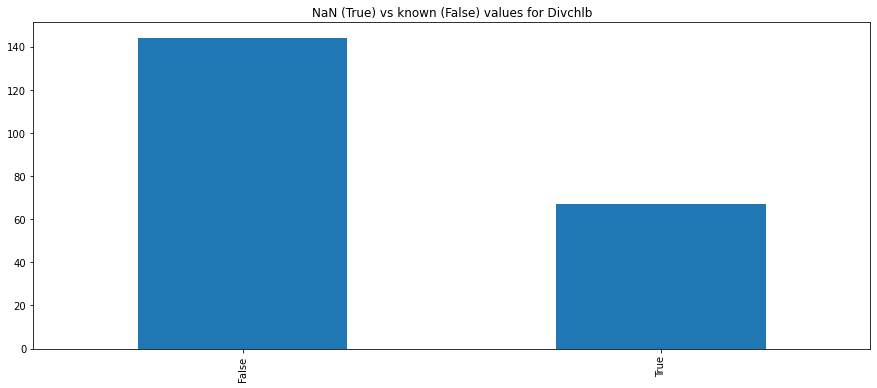

In [16]:
df['Divinyl chlorophyll b'].isnull().value_counts().plot(kind='bar')
plt.title('NaN (True) vs known (False) values for Divchlb')
;

We take the decision to remove this feature from our dataset. Most of it is unknown (NaN), and most of the known values are equal to 0.

In [17]:
pigments.remove('Divinyl chlorophyll b')
glob_df.drop('Divinyl chlorophyll b', axis=1, inplace=True)
tara_df.drop('Divinyl chlorophyll b', axis=1, inplace=True)

### Haptophytes concentration in TARA data

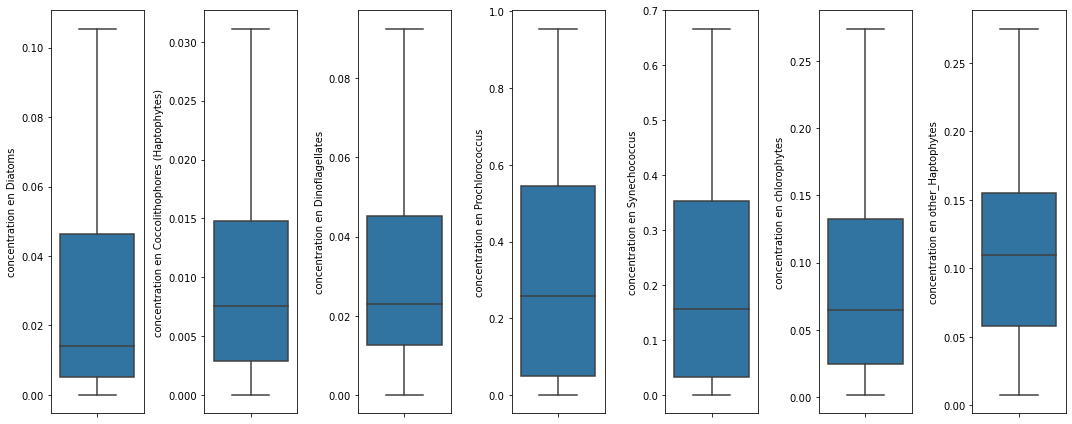

In [18]:
df = tara_df.copy()
selection = haptophytes

df = df.drop('Date', axis=1).astype(float)

fig, axes = plt.subplots(1, len(selection))

for i, col in enumerate(selection):
    ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], showfliers=False)
    #ax.set_ylim(df[col].min(), df[col].max())
    ax.set_ylabel(f'concentration en {col}')
fig.tight_layout()
plt.rcParams['figure.figsize']=(15,10)

## 2D analysis

### Correlation between pigment concentrations

sum of squared correlations s = 97.5228708544042


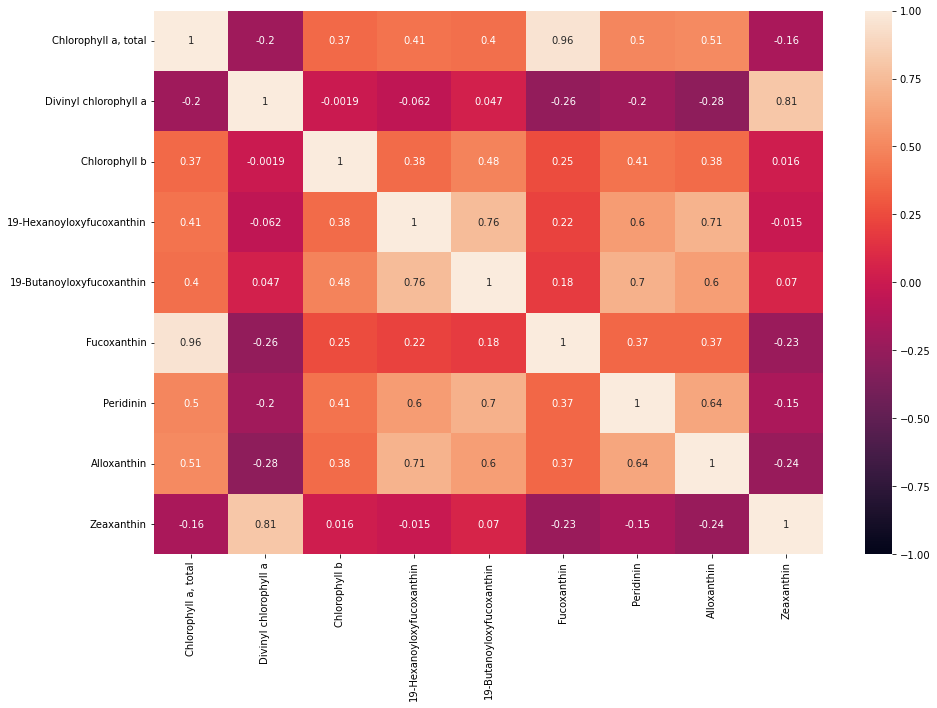

In [19]:
#methods : spearman, pearson, kendall
sns.heatmap(tara_df[pigments].corr(), vmin=-1, vmax=1, annot=True);
s = abs(tara_df[pigments].corr().sum()**2).sum()
print(f'sum of squared correlations {s = }')

In [20]:
print(f'mean absolute correlation: {tara_df[pigments].corr().applymap(abs).mean().mean()}')

mean absolute correlation: 0.4302656838748566


The mean absolute correlation is too low for us to try a PCA, which needs higher correlations between features.

### Plotting pairwise relationships

pairplot of pigment concentrations in TARA data


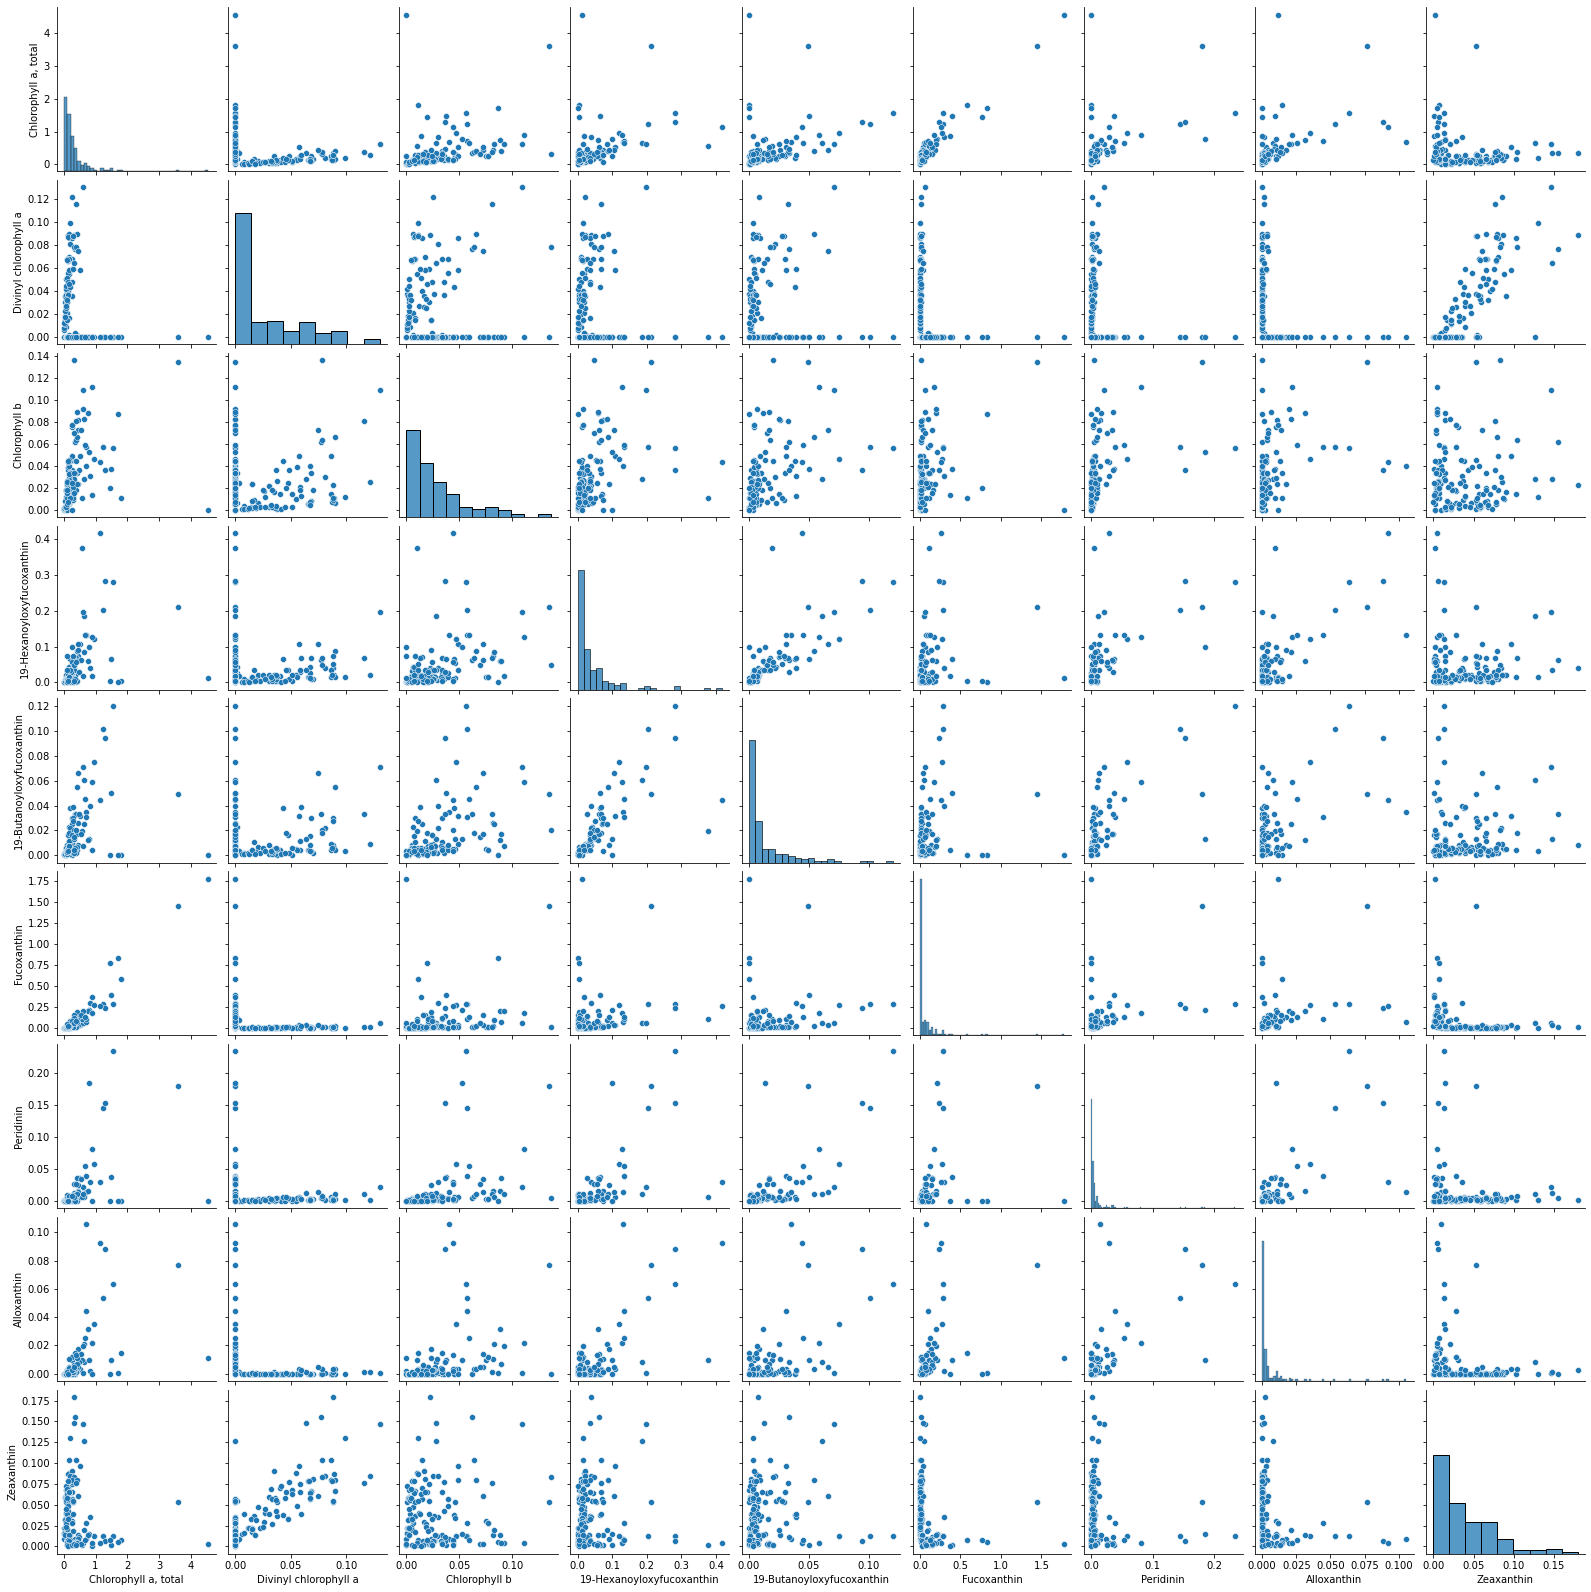

In [21]:
sns.pairplot(tara_df[pigments]);
print('pairplot of pigment concentrations in TARA data')

The distribution of data is always more dense for lower values of pigment concentration. We can try to apply a transformation to our values, to change the data distribution (and thus get more correlations).

## Log transformation

In [22]:
# x <- log(x+c) to avoid -inf values, with c=min(column)/2
tara_log = tara_df.copy()

for column in tara_log[haptophytes+pigments].columns:
    c = tara_df[column].drop_duplicates().nsmallest(2).iloc[-1]
    tara_log[column] = tara_log[column].apply(lambda x: np.log(c/2+float(x)) if isnan(x)==False else x)
print('TARA dataset after log transformation:')
display(tara_log.head())

print('\n\nglobal dataset after log transformation:')
glob_log = glob_df.copy()
for column in glob_log[pigments].columns:
    c = glob_df[column].drop_duplicates().nsmallest(2).iloc[-1]
    glob_log[column] = glob_log[column].apply(lambda x: np.log(c/2+float(x)) if isnan(x)==False else x)
display(glob_log.head())

TARA dataset after log transformation:


,Date,Latitude,Longitude,Diatoms,Coccolithophores (Haptophytes),Dinoflagellates,Prochlorococcus,Synechococcus,chlorophytes,other_Haptophytes,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
Station,,,,,,,,,,,,,,,,,,,
TARA_001,2009-09-07,44.415,-9.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_002,2009-09-09,39.038,-10.790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_003,2009-09-13,36.672,-10.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_004,2009-09-15,36.563,-6.553,-5.494943,-4.250386,-3.736243,-0.384082,-1.845111,-3.340608,-3.176933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARA_005,2009-09-20,36.030,-4.405,-4.250188,-4.078319,-3.446057,-1.643513,-0.823473,-3.023931,-2.012529,-0.848875,-6.272351,-3.40271,-3.672497,-5.546228,-2.10863,-11.640759,-6.473017,-4.945608




global dataset after log transformation:


,Date,Latitude,Longitude,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,1992-06-02,18.300,-21.056,-0.729500,-2.899513,-2.829735,-2.465104,-4.132046,-3.584519,-4.073651,-5.184989,-1.671047
1,1992-06-05,20.325,-18.366,0.221662,-9.903488,-1.283635,-1.394327,-2.796062,-1.106392,-2.748636,-2.257612,-3.242912
2,1992-06-06,20.361,-18.341,0.416834,-9.903488,-1.579741,-1.452434,-2.732599,-0.454524,-2.882133,-1.581823,-3.504893
3,1997-06-13,20.322,-18.344,1.212878,-9.903488,-10.465606,-1.987774,-3.350980,0.720641,-2.464926,NaN,-3.035513
4,1992-06-16,18.302,-21.071,0.281526,-9.903488,-1.650111,-1.244795,-2.936520,-1.094371,-1.883775,-3.486755,-1.748413


Plotting pairplot after log transformation:

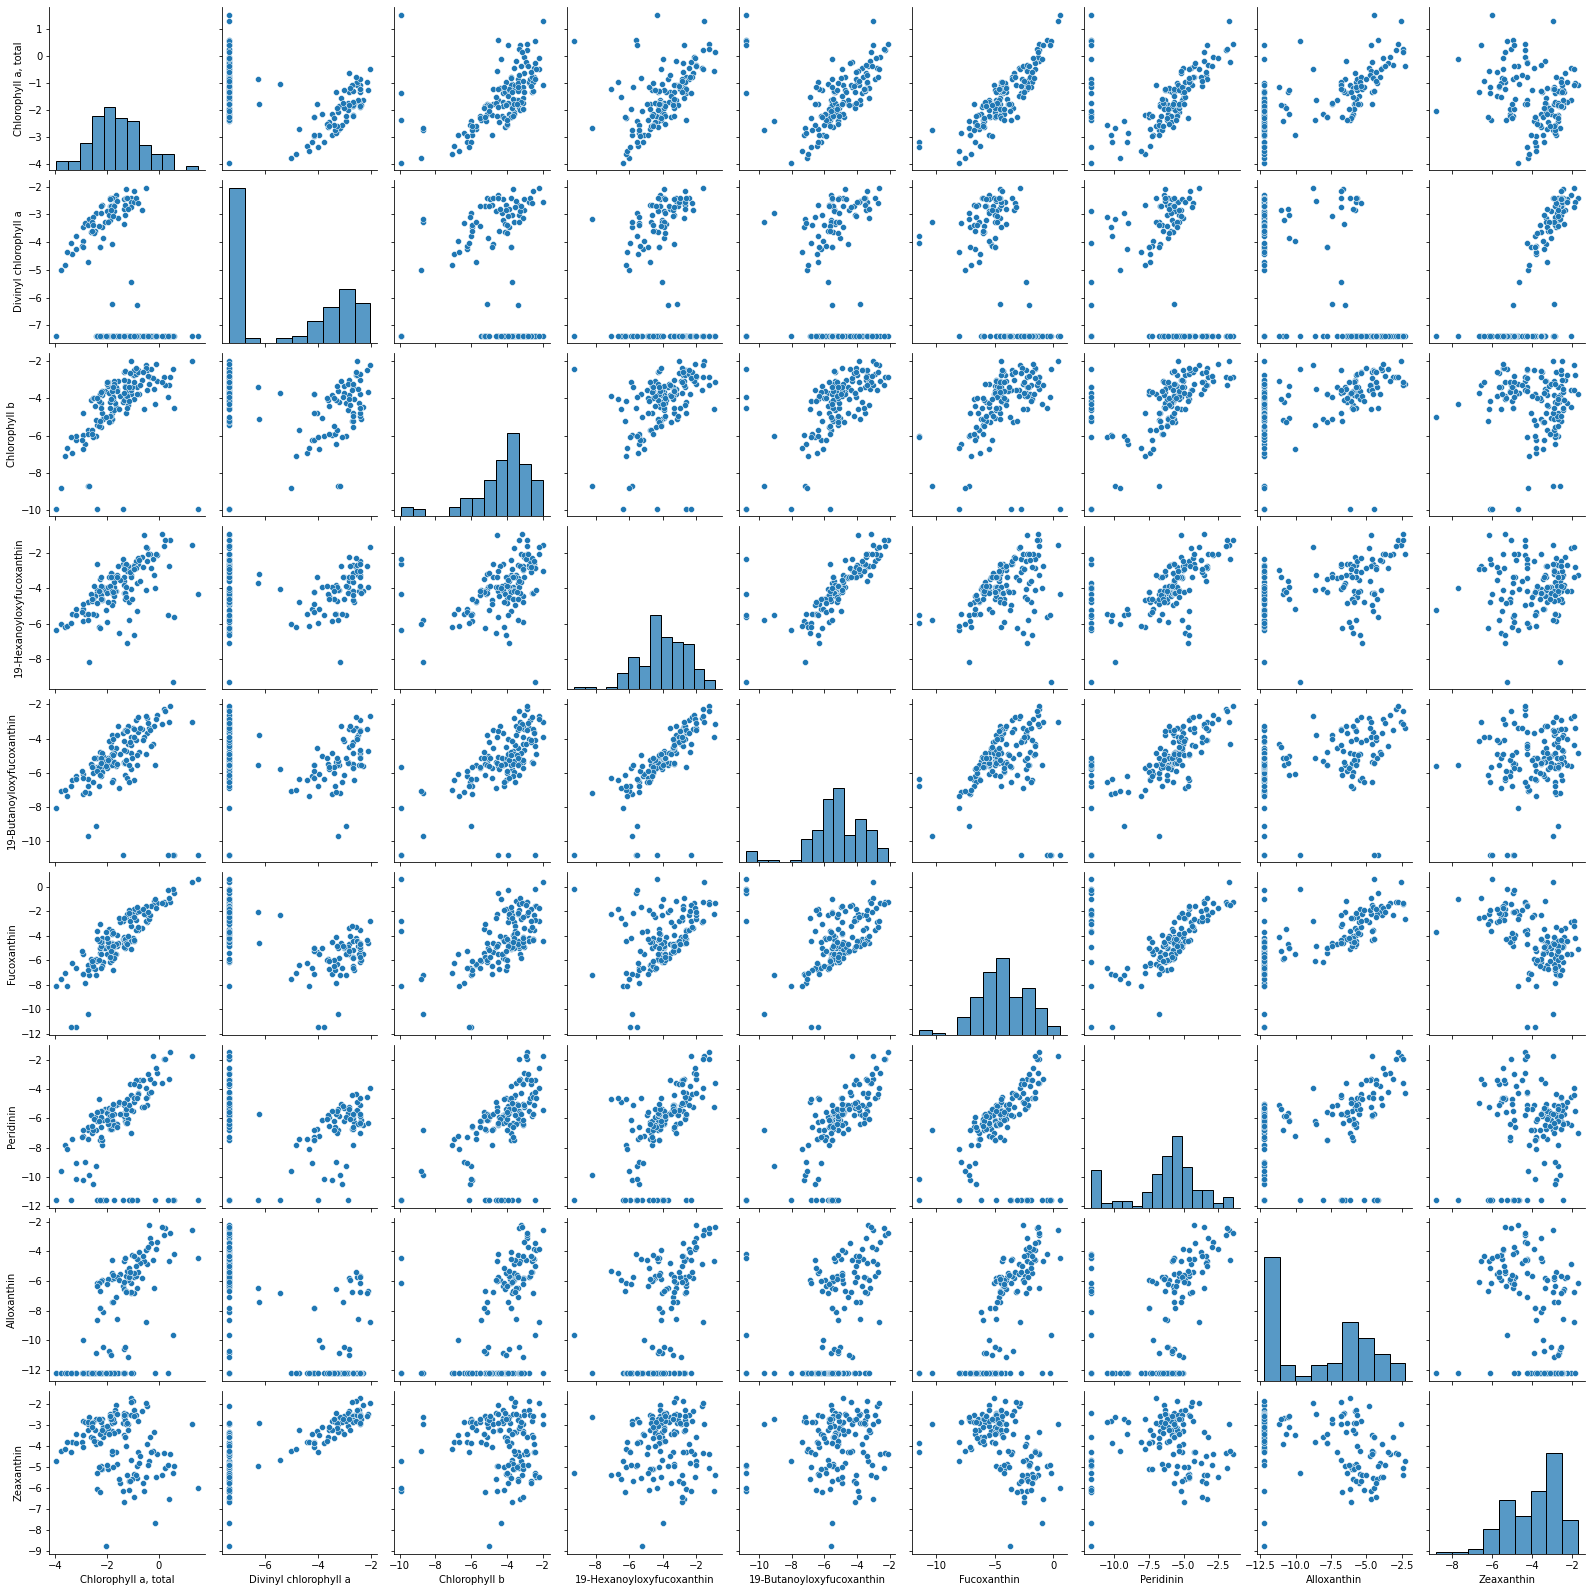

In [23]:
sns.pairplot(tara_log[pigments]);

It appears that the data distribution looks much more like a gaussian distribution, which will help us for our analysis and prediction. Data is less dense for lower values.
Still, Divinyl chlorophyll a has a lot of null values. Maybe we could get rid of it as well, or at least get rid of the null values and replace them with NaN so it does not interfere with our analysis.

NaN values (True) vs known values (False)


False    144
True      67
Name: Divinyl chlorophyll a, dtype: int64

''

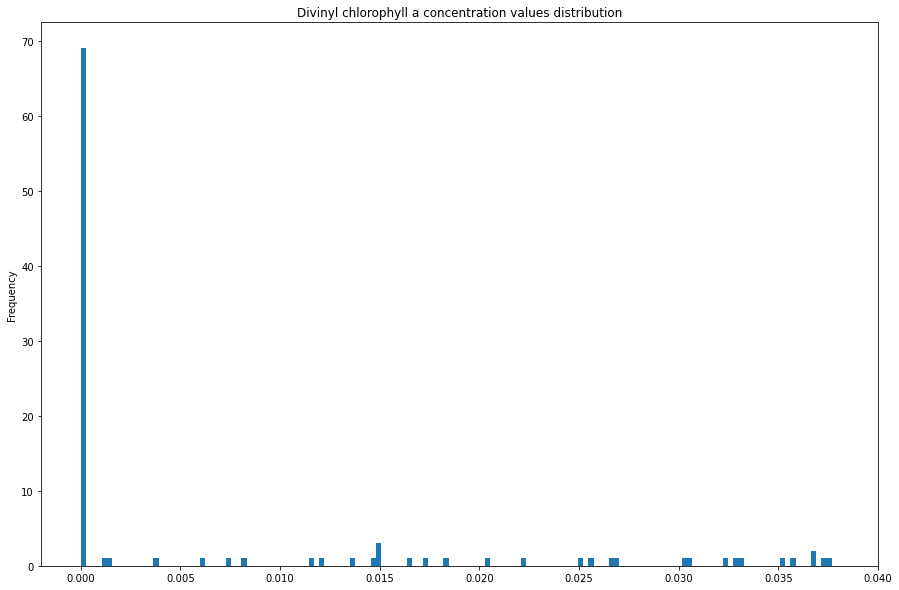

In [24]:
print('NaN values (True) vs known values (False)')
display(tara_df['Divinyl chlorophyll a'].isna().value_counts())
tara_df['Divinyl chlorophyll a'].plot(kind='hist', bins=500)
plt.title('Divinyl chlorophyll a concentration values distribution')
plt.xlim([-0.002, 0.04])
;

While most of our data is known, almost all of it is equal to 0. It does not give us much information, so we might as well get rid of the null values.
We do the same thing for Alloxanthin (same behavior).

In [25]:
glob_df.loc[glob_df['Divinyl chlorophyll a'] == 0, 'Divinyl chlorophyll a'] = np.nan
tara_df.loc[tara_df['Divinyl chlorophyll a'] == 0, 'Divinyl chlorophyll a'] = np.nan

glob_df.loc[glob_df['Alloxanthin'] == 0, 'Alloxanthin'] = np.nan
tara_df.loc[tara_df['Alloxanthin'] == 0, 'Alloxanthin'] = np.nan

In [26]:
tara_log = tara_df.copy()
for column in tara_log[haptophytes+pigments].columns:
    c = tara_df[column].drop_duplicates().nsmallest(2).iloc[-1]
    tara_log[column] = tara_log[column].apply(lambda x: np.log(c/2+float(x)) if isnan(x)==False else x)
glob_log = glob_df.copy()
for column in glob_log[pigments].columns:
    c = glob_df[column].drop_duplicates().nsmallest(2).iloc[-1]
    glob_log[column] = glob_log[column].apply(lambda x: np.log(c/2+float(x)) if isnan(x)==False else x)

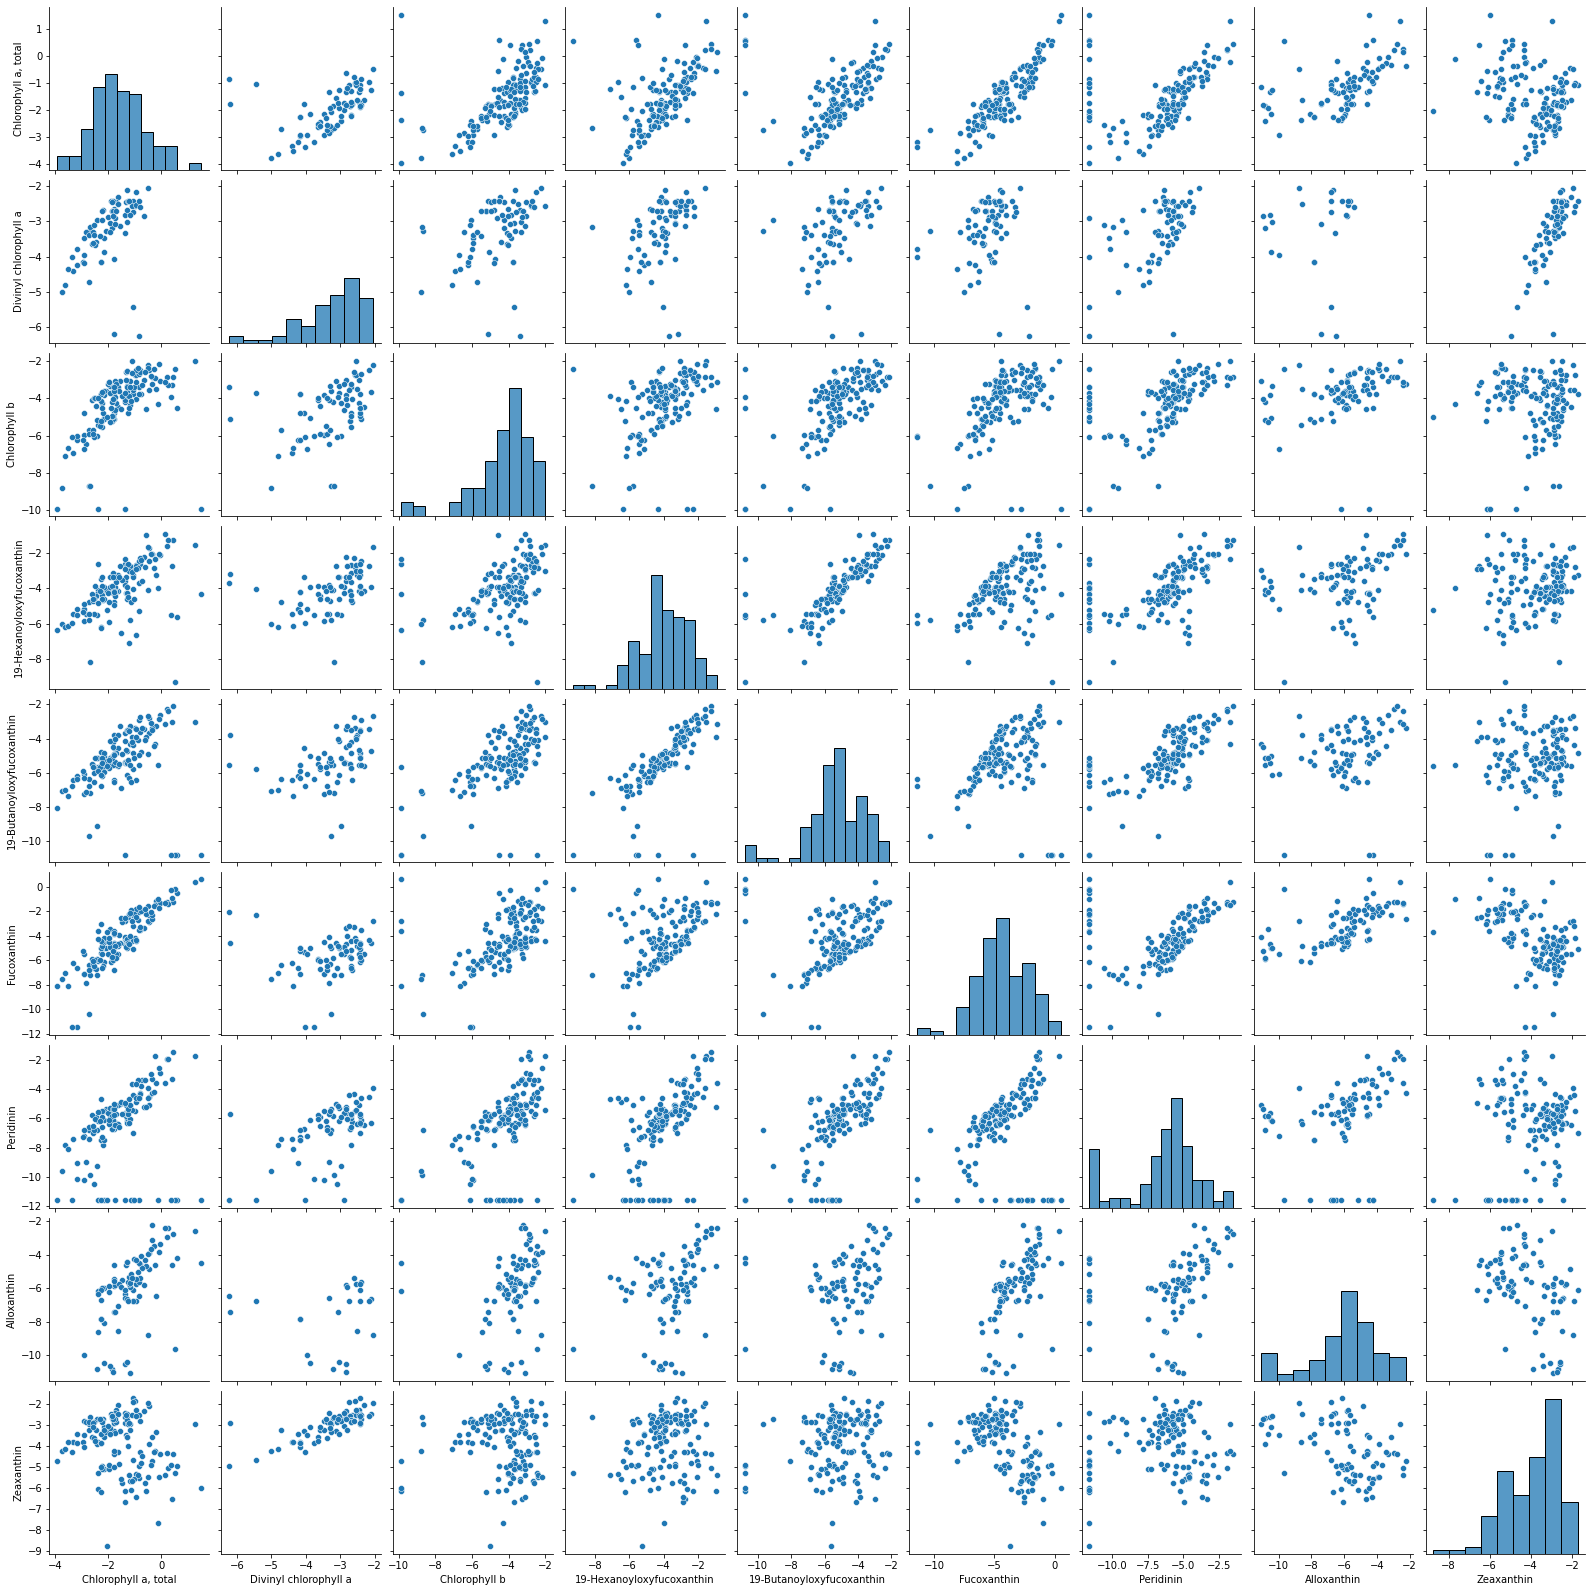

In [27]:
sns.pairplot(tara_log[pigments]);

sum of squared correlations s = 143.32748012866222
mean absolute correlation: 0.48294747257193116


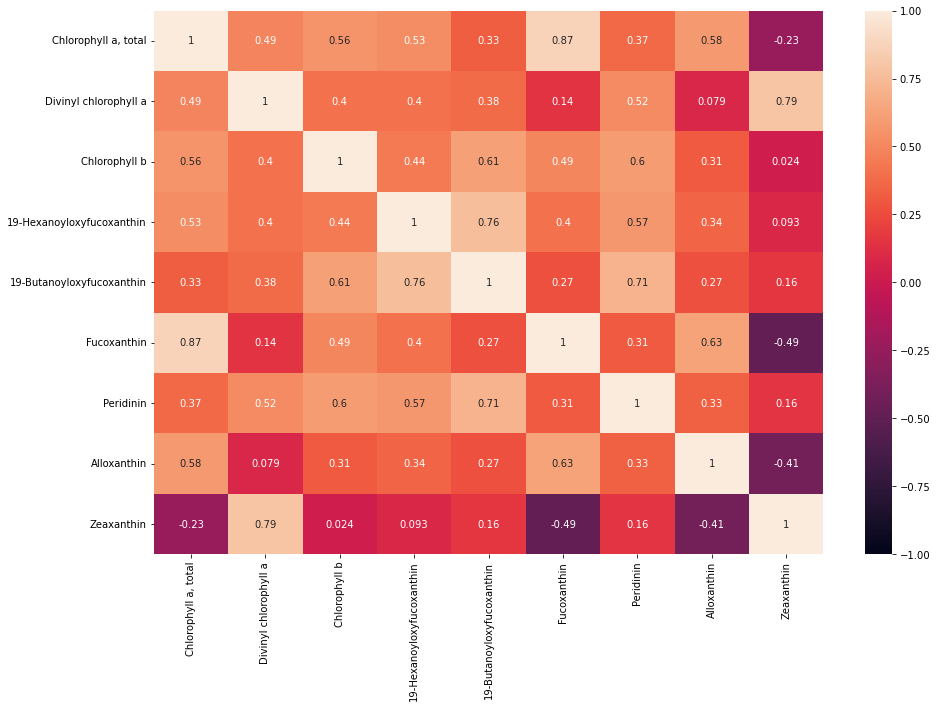

In [28]:
sns.heatmap(tara_log[pigments].corr(), vmin=-1, vmax=1, annot=True);
s = abs(tara_log[pigments].corr().sum()**2).sum()
print(f'sum of squared correlations {s = }')
print(f'mean absolute correlation: {tara_log[pigments].corr().applymap(abs).mean().mean()}')

## Inverse hyperbolic sine transformation

In [29]:
def transfo(y,theta):
    return np.log(theta*y + ((theta*y)**2+1)**0.5)/theta

In [30]:
theta = 1

tara_asinh = tara_df.copy()
for column in tara_asinh[haptophytes+pigments].columns:
    tara_asinh[column] = tara_asinh[column].apply(lambda x: transfo(x, theta))

glob_asinh = glob_df.copy()
for column in glob_asinh[pigments].columns:
    glob_log[column] = glob_asinh[column].apply(lambda x: transfo(x, theta))

In [31]:
dic = {}

for theta in np.linspace(0,100,101):
    tara_asinh = tara_df.copy()
    for column in tara_asinh[haptophytes+pigments].columns:
        tara_asinh[column] = tara_asinh[column].apply(lambda x: transfo(x, theta))
    s = abs(tara_asinh[pigments].corr().sum()**2).sum()
    dic[theta] = s
print(f'maximum correlation for theta = {max(dic, key=dic.get)}')

maximum correlation for theta = 74.0


In [32]:
theta_ = max(dic, key=dic.get)
tara_asinh = tara_df.copy()
for column in tara_asinh[haptophytes+pigments].columns:
    tara_asinh[column] = tara_asinh[column].apply(lambda x: transfo(x, theta_))

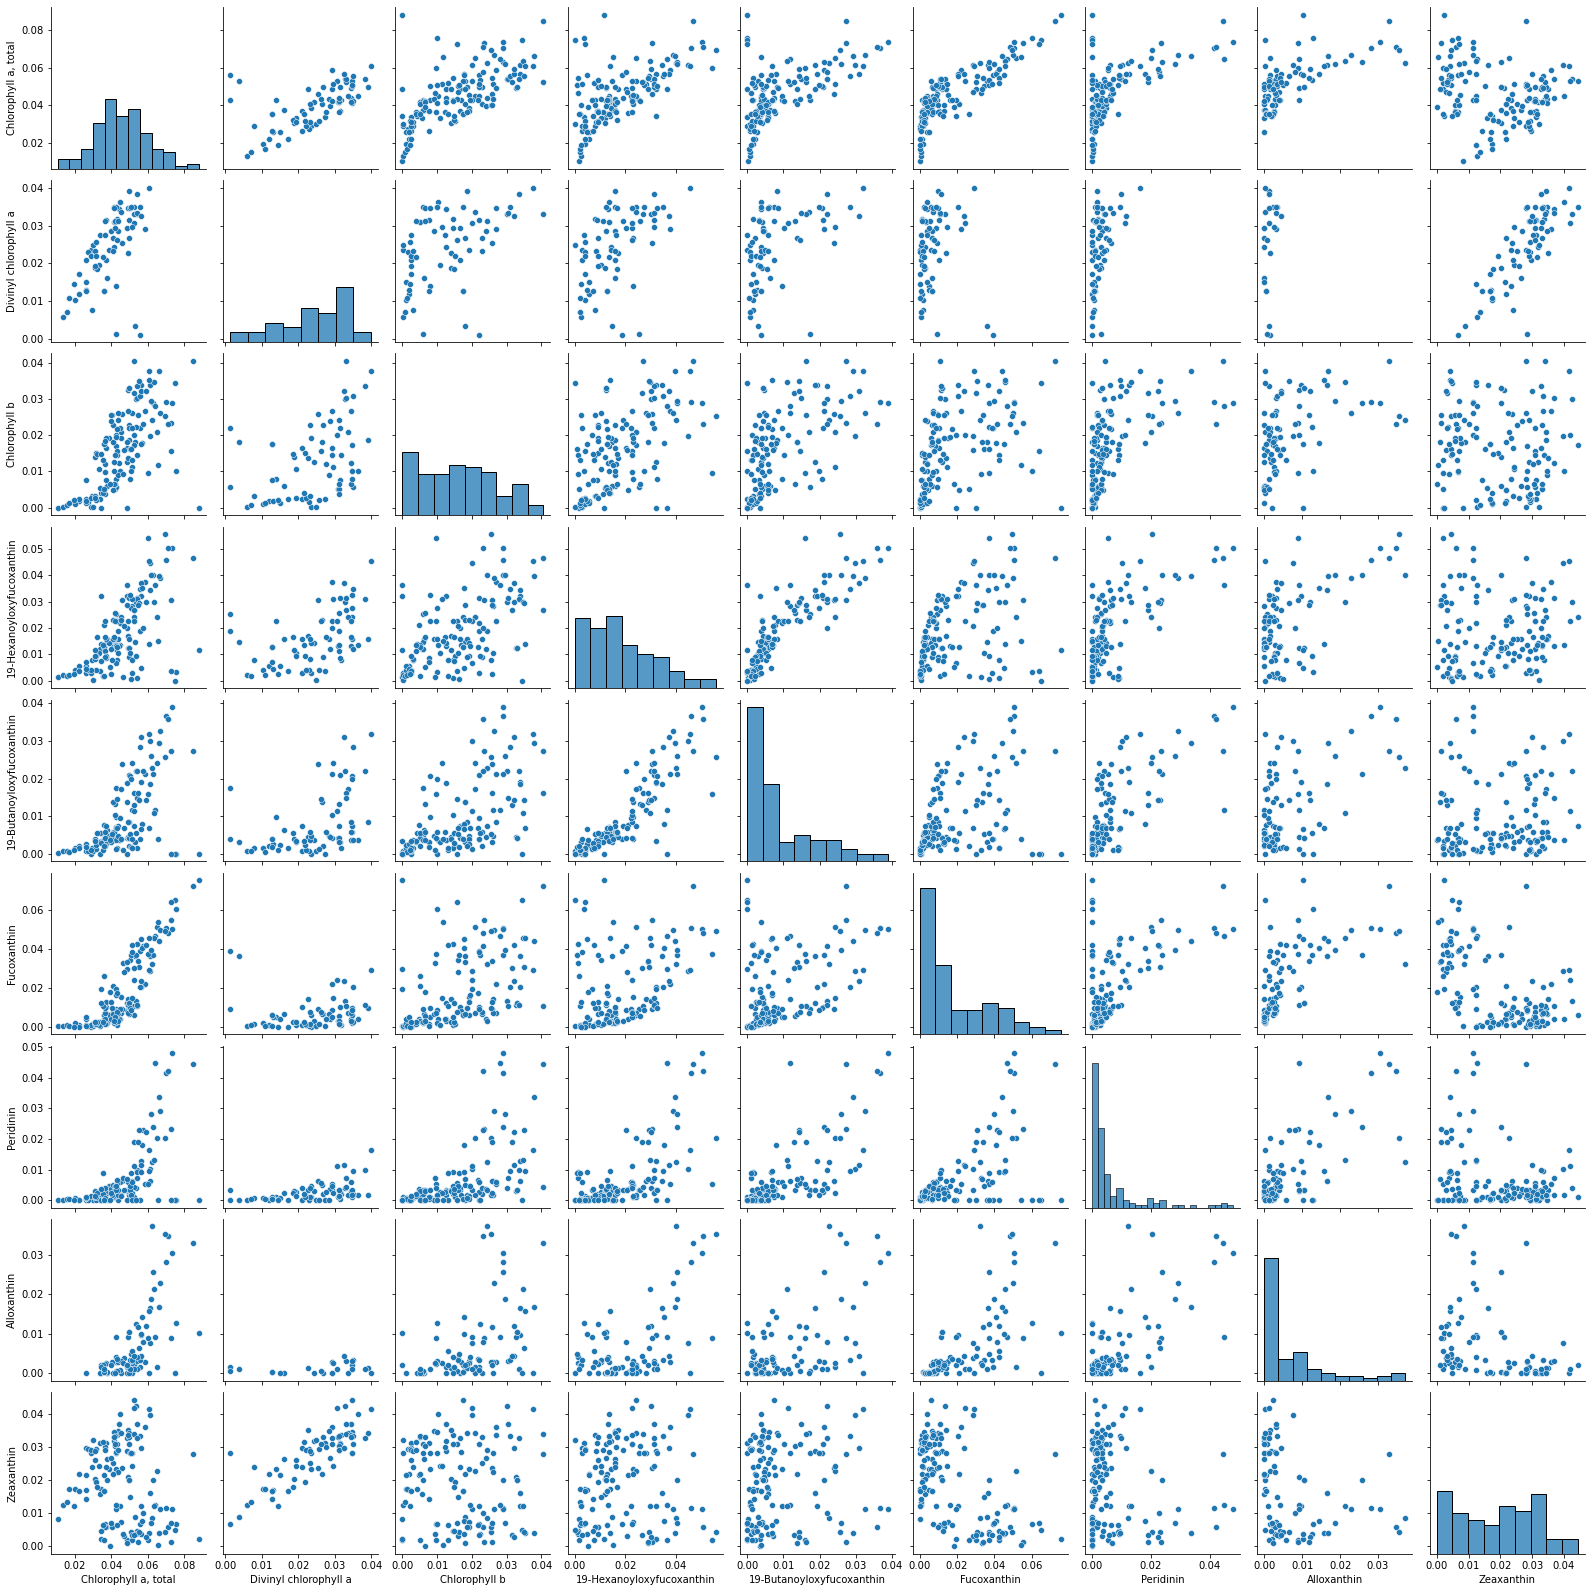

In [33]:
sns.pairplot(tara_asinh[pigments]);

sum of squared correlations s = 189.7494121469659
mean absolute correlation: 0.5520861952742161


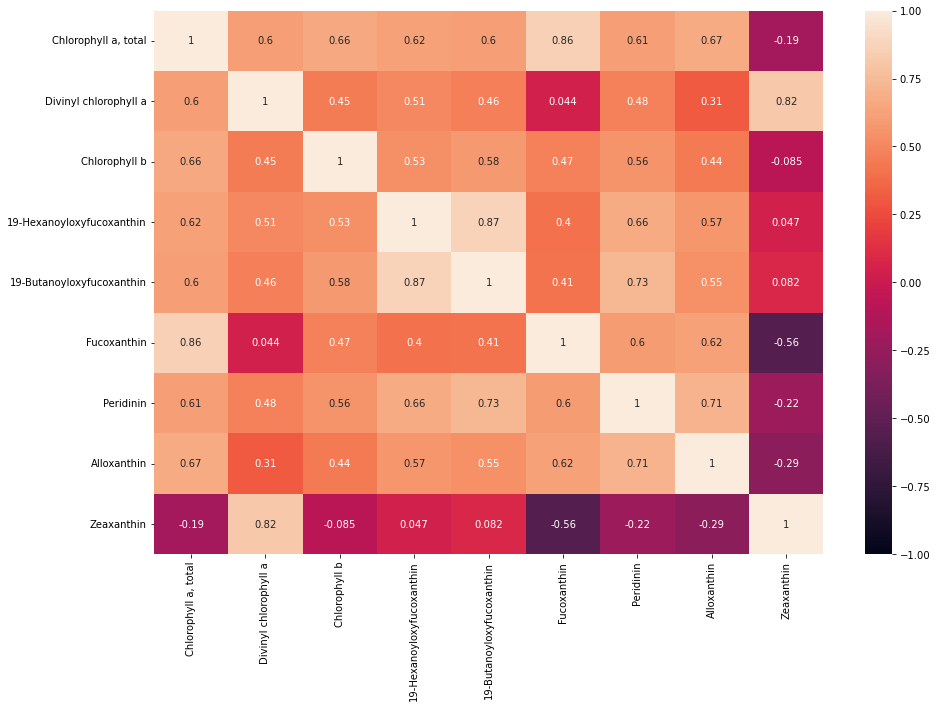

In [34]:
sns.heatmap(tara_asinh[pigments].corr(), vmin=-1, vmax=1, annot=True);
s = abs(tara_asinh[pigments].corr().sum()**2).sum()
print(f'sum of squared correlations {s = }')
print(f'mean absolute correlation: {tara_asinh[pigments].corr().applymap(abs).mean().mean()}')